## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems (ICIP 2021)

In [1]:
%matplotlib inline 

# from imports import *
import torch
import matplotlib.pyplot as plt
import numpy as np
from algorithms import *
from Utilities import display_results
import sys
sys.path.append('problems/')
sys.path.append('denoisers/')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
from problems.PR import PhaseRetrieval
from denoisers.BM3D import BM3DDenoiser

# Figures 1: Compare Image Fidelity for Different Algorithms 

In [3]:
height = 128
width = 128
alpha = .5       # ratio measurements / dimensions
snr = 10.

main_problem = PhaseRetrieval(img_path='./data/Set12/01.png', H=height, W=width, num_meas = int(alpha*height*width), snr=snr)

0.19323326801887186 8192


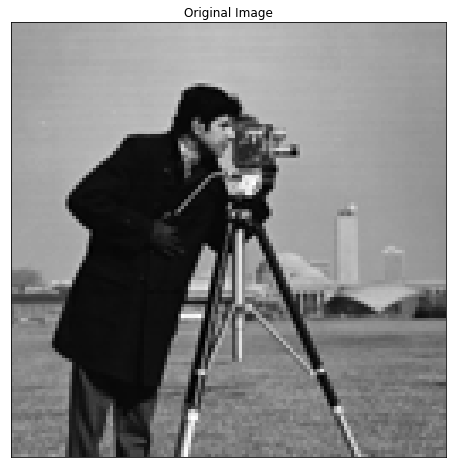

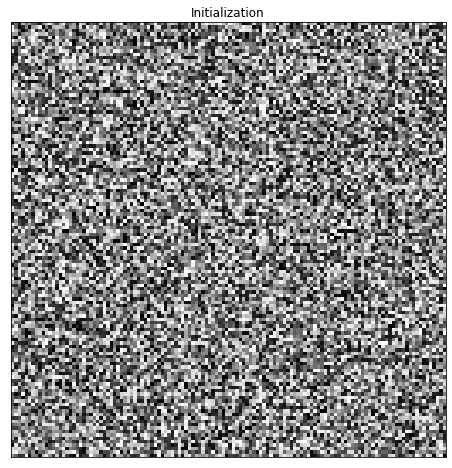

In [4]:
main_problem.display(show_measurements=False, save_results=True)
print(main_problem.sigma, main_problem.M)


In [5]:
denoiser = BM3DDenoiser(sigma_modifier=1.06)
results_svrg = pnp_svrg(main_problem, denoiser=denoiser, eta=.0998, tt=60, T2=10, mini_batch_size=1100, verbose=True, converge_check=False)

0 0 Before denoising:  8.927366195419024
After denoising update: 0 0 12.710757173244765
0 1 Before denoising:  12.304635823619103
After denoising update: 0 1 13.211133628583303
0 2 Before denoising:  12.703248876031745
After denoising update: 0 2 13.716251143678802
0 3 Before denoising:  13.152458942706708
After denoising update: 0 3 14.164694822683806
0 4 Before denoising:  13.505755291423394
After denoising update: 0 4 14.61125852742462
0 5 Before denoising:  13.917511156670022
After denoising update: 0 5 15.088386749084908
0 6 Before denoising:  14.173927712049437
After denoising update: 0 6 15.498420583799819
0 7 Before denoising:  14.519085027659042
After denoising update: 0 7 15.94519771778258
0 8 Before denoising:  14.749531190725309
After denoising update: 0 8 16.365332142169752
0 9 Before denoising:  15.124723220212887
After denoising update: 0 9 16.803549631327385
1 0 Before denoising:  17.43942459716746
After denoising update: 1 0 17.41608484583901
1 1 Before denoising:  18.

In [ ]:
master_psnr_fig = display_results(main_problem, results_svrg, save_results=True)

In [ ]:
denoiser = BM3DDenoiser(sigma_modifier=0.8)
results_sgd = pnp_sgd(main_problem, denoiser=denoiser, eta=1e-1, tt=60, mini_batch_size=1000, verbose=True, converge_check=False)

In [ ]:
master_psnr_fig = display_results(main_problem, results_sgd, save_results=True)

In [ ]:
denoiser = BM3DDenoiser(sigma_modifier=0.9)
results_gd = pnp_gd(main_problem, denoiser=denoiser, eta=7e-1, tt=60, verbose=True)

In [ ]:
master_psnr_fig = display_results(main_problem, results_gd, save_results=True)

In [ ]:
denoiser = BM3DDenoiser(sigma_modifier=0.9)
results_saga = pnp_saga(main_problem, denoiser=denoiser, eta=5e-2, tt=60, mini_batch_size=1000, hist_size=5, verbose=True)

In [ ]:
master_psnr_fig = display_results(main_problem, results_saga, save_results=True)

In [ ]:
denoiser = BM3DDenoiser(sigma_modifier=0.8, decay=0.995)
results_sarah = pnp_sarah(main_problem, denoiser=denoiser, eta=3e-2, tt=60, T2=10, mini_batch_size=100, verbose=True)

In [ ]:
master_psnr_fig = display_results(main_problem, results_sarah, save_results=True)

# Figure 2(a): Compare PSNR over time using NLM

## Figure 2(b): Compare Sampling Ratio for each PnP Algorithm

## Figure 3: Compare Image Denoising Routines with PnP-SVRG using RGB Images